# Classification 1: Generative methods

## StatML: Lecture 6

## Prof. James Sharpnack

- Some content and images are from "The Elements of Statistical Learning" by Hastie, Tibshirani, Friedman
- Reading ESL Chapter 4

### Bayes rule in classification

Recall from homework that Bayes rule is 
$$
g(x) = \left\{ \begin{array}{ll} 1, &\mathbb P \{Y = 1 | X = x \} > \mathbb P \{Y = 0 | X = x \} \\
0, &{\rm otherwise}\end{array}\right.
$$
Another way to write this event is (for $f_X(x) > 0$)
$$
f_{Y,X}(1, x) = \mathbb P \{Y = 1 | X = x \} f_X(x) > \mathbb P \{Y = 0 | X = x \} f_X(x) = f_{Y,X} (0, x)
$$
Let $\pi = \mathbb P \{ Y = 1\}$ then this is also
$$
\pi f_{X|Y}(x | 1) > (1 - \pi) f_{X|Y} (x|0)
$$
which is 
$$
\frac{f_{X|Y}(x | 1)}{f_{X|Y} (x|0)} > \tau = \frac{1-\pi}{\pi}
$$

### Bayes rule in classification

$$
\frac{f_{X|Y}(x | 1)}{f_{X|Y} (x|0)} > \tau = \frac{1-\pi}{\pi}
$$

> the Bayes rule is performing a likelihood ratio test

![](LRT.PNG)

### Generative methods

A *generative method* does the following
1. treats $Y=1$ and $Y=0$ as different datasets and tries to estimate the densities $\hat f_{X | Y}$.
2. then plug these in to the formula for the Bayes rule



- *Naive Bayes* methods assume that each component of $X$ is independent of one another, but does non-parametric density estimation for the densities $\hat f_{X_j|Y}$
- *Parametric methods* fit a parametric density to $X|Y$ 

### Density estimation

1. Parametric maximum likelihood estimation
2. Nonparametric: Kernel density estimation (KDE), nearest neighbor methods, 

Reasonable heuristic for estimating a density $\hat f_X$, based on data $x_1,\ldots,x_n$ is
1. Let $N(x,\epsilon)$ be the number of data points within $\epsilon$ of $x$
2. $\hat f(x) = N(x,\epsilon) / n$Vol$(B(\epsilon))$ divide by the volume of the ball of radius $\epsilon$

$$\mathbb E \left( \frac{N(x,\epsilon)}{n} \right)= \mathbb P\{X \in B(x,\epsilon) \} \approx f_x(x) \textrm{Vol}(B(\epsilon))$$ 

### Kernel density estimation

Let the Boxcar kernel function be
$$
k(\|x_0-x_1\|) = \frac{1\{ \| x_0 - x_1 \| \le 1 \}}{{\rm Vol}(B(1))}
$$
then the number of pts within $\epsilon$ is
$$
N(x,\epsilon) = {\rm Vol}(B(1)) \sum_i k\left( \frac{\| x - x_i \|}{\epsilon} \right)
$$
and the density estimate is 
$$
\hat f(x) = \frac 1n \sum_i \frac{{\rm Vol}(B(1))}{{\rm Vol}(B(\epsilon))} \cdot k\left( \frac{\| x - x_i \|}{\epsilon} \right)
$$
this is equal to 
$$
\hat f(x) = \frac 1n \sum_i \frac{1}{\epsilon^p} \cdot k\left( \frac{\| x - x_i \|}{\epsilon} \right)
$$

### Kernel density estimation

General kernel density estimate is based on a *kernel* such that 
$$
\int k(\|x-x_0\|) dx = 1.
$$

Then KDE is 
$$
\hat f(x') = \frac 1n \sum_i \frac{1}{\epsilon^p} \cdot k\left( \frac{\| x' - x_i \|}{\epsilon} \right)
$$
where $p$ is the dimensionality of the X space.
$\epsilon$ is a bandwidth parameter.

![](kde.png)
from wikipedia

### Naive Bayes


For each $y = 0,1$ let $x_1,\ldots,x_{n_y}$ be the predictor data with $Y = y$
 - For each dimension j 
   - Let $\hat f_{y,j}$ be the KDE of $x_{1,j},\ldots,x_{n_y,j}$
 - Let $\hat f_y = \prod_j \hat f_{y,j}$
 
Let $\pi$ be the proportion of $Y = 1$ then let $\tau = (1 - \pi) / \pi$.

Predict $\hat y = 1$ for a new $x'$ if 
$$
\frac{\hat f_{1}(x')}{\hat f_{0} (x')} > \tau
$$
and $\hat y=0$ otherwise.

![](naive_bayes.png)
from mathworks.org

### Exercise 6.1

Let $x_0,x_1 \in \mathbb R^p$ and
$$k(\|x_0 - x_1\|) = \frac{1}{(2\pi)^{k/2}} \exp \left(- \frac 12 \|x_0 - x_1\|_2^2 \right).$$
How do we know that this is a valid kernel for multivariate density estimation?

Suppose that you used this kernel to obtain a multivariate density estimate, $\hat f: \mathbb R^p \rightarrow \mathbb R$, and also used the subroutine in Naive Bayes to estimate $\hat f_N(x') = \prod_j \hat f_j(x_j')$.  Will these return the same results?  Think about the boxcar kernel with bandwidth of 1, what are the main differences between these methods?

# STOP

### Answer to 6.1

1. This is a Gaussian pdf with mean $x_1$ and variance $I$ so it integrates to 1.
2. They are not the same because
$$
\frac 1n \sum_i \exp\left(-\frac 12 \sum_j (x_{ij} - x_j')^2\right) \ne \prod_j \left( \frac 1n \sum_i \exp(-\frac 12 (x_{ij} - x_j')^2)\right)
$$
For the boxcar kernel in p dimensions, $k(\| x' - x_i\|) \ne 0$ if $\| x' - x_i \| \le 1$ while $k(|x_j' - x_{ij}|) \ne 0$ if $|x_j' - x_{ij}| \le 1$.  So $\hat f_N(x') \ne 0$ if $|x_j' - x_{ij}| \le 1$ for all j.

### Gaussian Generative Models

- Fit parametric model for each class using likelihood based approach.
- Assume a Gaussian distribution
$$
X | Y = k \sim \mathcal N(\mu_k, \Sigma_k)
$$
for mean and variance parameters $\mu_k, \Sigma_k$.

![](gaussian.PNG)

![](lda_math.PNG)

![](LDA.PNG)

![](lda_fit.PNG)

![](qda_pred.PNG)

![](QDA.PNG)

![](qda_fit.PNG)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import plotnine as p9
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.simplefilter("ignore")

from sklearn import neighbors, preprocessing, impute, metrics, model_selection, linear_model, svm, feature_selection

In [2]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 6,6

In [35]:
def train_bank_to_xy(bank):
    """standardize and impute training"""
    bank_sel = bank[['age','balance','duration','y']].values
    X,y = bank_sel[:,:-1], bank_sel[:,-1]
    scaler = preprocessing.StandardScaler().fit(X)
    imputer = impute.SimpleImputer(fill_value=0).fit(X)
    trans_prep = lambda Z: imputer.transform(scaler.transform(Z)) 
    X = trans_prep(X)
    y = (y == 'yes')*1
    return (X, y), trans_prep

def test_bank_to_xy(bank, trans_prep):
    """standardize and impute test"""
    bank_sel = bank[['age','balance','duration','y']].values
    X,y = bank_sel[:,:-1], bank_sel[:,-1]
    X = trans_prep(X)
    y = (y == 'yes')*1
    return (X, y)

In [36]:
bank = pd.read_csv('../../data/bank.csv',sep=';',na_values=['unknown',999,'nonexistent'])
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4483 non-null object
marital      4521 non-null object
education    4334 non-null object
default      4521 non-null object
balance      4519 non-null float64
housing      4521 non-null object
loan         4521 non-null object
contact      3197 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     816 non-null object
y            4521 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 600.6+ KB


In [37]:
bank_tr, bank_te = model_selection.train_test_split(bank,test_size=.33)

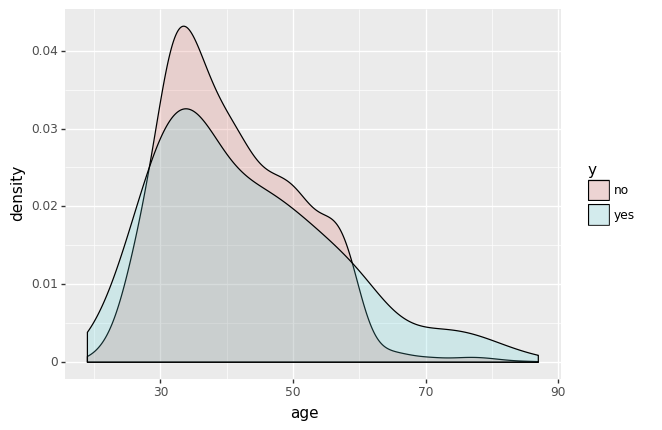

<ggplot: (8769840697913)>

In [38]:
p9.ggplot(bank_tr, p9.aes(x = 'age',fill = 'y')) + p9.geom_density(alpha=.2)

In [39]:
(X_tr, y_tr), trans_prep  = train_bank_to_xy(bank_tr)
X_te, y_te = test_bank_to_xy(bank_te, trans_prep)

In [62]:
def plot_conf_score(y_te,score,tau):
    y_classes = (1,0)
    cf_inds = ["Pred {}".format(c) for c in y_classes]
    cf_cols = ["True {}".format(c) for c in y_classes]
    y_pred = score_dur > tau
    return pd.DataFrame(metrics.confusion_matrix(y_pred,y_te,labels=y_classes),index=cf_inds,columns=cf_cols)

### Evaluating a classifier 

Most classifiers are "soft" because they can output a score, higher means more likely to be $Y=1$
- Logistic regression: output probability
- SVM: distance from margin
- kNN: percent of neighbors with $Y=1$
- LDA/QDA/Naive bayes: estimated likelihood ratio


1. If we order from largest to smallest then this gives us the points to predict as 1 first.
2. Choose a cut-off to say all above this value are 1 and below are 0 can see different errors

### Confusion matrix and classification metrics

<table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>True 1</td><td>True 0</td></tr>
    <tr><td>Pred 1</td><td>True Pos</td><td>False Pos</td></tr>
    <tr><td>Pred 0</td><td>False Neg</td><td>True Neg</td></tr>
</table>

$$
\textrm{FPR} = \frac{FP}{FP+TN}
$$
$$
\textrm{TPR, Recall} = \frac{TP}{TP + FN}
$$
$$
\textrm{Precision} = \frac{TP}{TP + FP}
$$

In [41]:
score_dur = X_te[:,2]

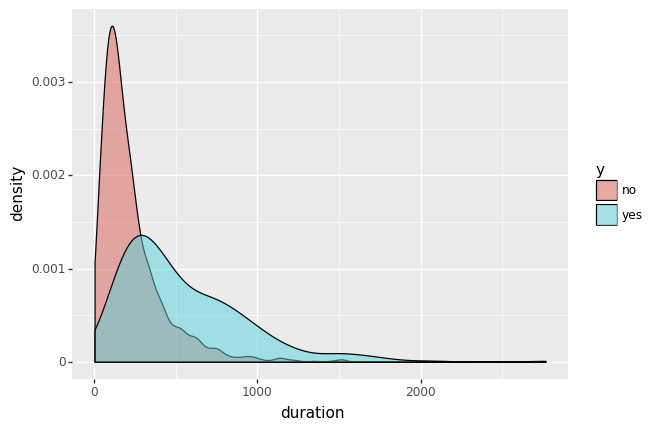

<ggplot: (8769840727609)>

In [42]:
p9.ggplot(bank_tr[['duration','y']].dropna(axis=0)) + p9.aes(x = 'duration',fill = 'y')\
+ p9.geom_density(alpha=.5)

In [43]:
y_te

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
plot_conf_score(y_te,score_dur,1.)

,True 1,True 0
Pred 1,73,108
Pred 0,86,1225


In [65]:
plot_conf_score(y_te,score_dur,2.)

,True 1,True 0
Pred 1,36,27
Pred 0,123,1306


In [67]:
## Fit and find NNs
nn = neighbors.NearestNeighbors(n_neighbors=10,metric="l2")
nn.fit(X_tr)
dists, NNs = nn.kneighbors(X_te)
NNs[1], y_tr[NNs[1]].mean(), y_te[1]

(array([1047,  967, 2665, 2117, 1387,  963,  714, 2709, 2074,  102]), 0.0, 0)

In [68]:
score_nn = np.array([(y_tr[knns] == 1).mean() for knns in NNs])
plot_conf_score(y_te,score_nn,.2)

,True 1,True 0
Pred 1,110,268
Pred 0,49,1065


In [69]:
nn = neighbors.KNeighborsClassifier(n_neighbors=10)
nn.fit(X_tr, y_tr)
score_nn = nn.predict_proba(X_te)[:,1]
plot_conf_score(y_te,score_nn,.2)

,True 1,True 0
Pred 1,110,268
Pred 0,49,1065


In [70]:
def print_top_k(score_dur,y_te,k_top):
    ordering = np.argsort(score_dur)[::-1]
    print("k: score, y")
    for k, (yv,s) in enumerate(zip(y_te[ordering],score_dur[ordering])):
        print("{}: {}, {}".format(k,s,yv))
        if k >= k_top - 1:
            break

In [71]:
print_top_k(score_dur,y_te,10)

k: score, y
0: 10.73632820860862, 0
1: 8.523111971642173, 1
2: 6.862227379050481, 1
3: 6.726089297690506, 0
4: 6.636627129939665, 1
5: 5.738115792963831, 0
6: 5.111880618707947, 1
7: 4.699576715160595, 0
8: 4.676238758356028, 1
9: 4.6023352284748995, 1


### Confusion matrix and classification metrics

<table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>True 1</td><td>True 0</td></tr>
    <tr><td>Pred 1</td><td>True Pos</td><td>False Pos</td></tr>
    <tr><td>Pred 0</td><td>False Neg</td><td>True Neg</td></tr>
</table>

$$
\textrm{FPR} = \frac{FP}{FP+TN}
$$
$$
\textrm{TPR, Recall} = \frac{TP}{TP + FN}
$$
$$
\textrm{Precision} = \frac{TP}{TP + FP}
$$

In [72]:
plt.style.use('ggplot')

Text(0.5, 1.0, "ROC for 'duration'")

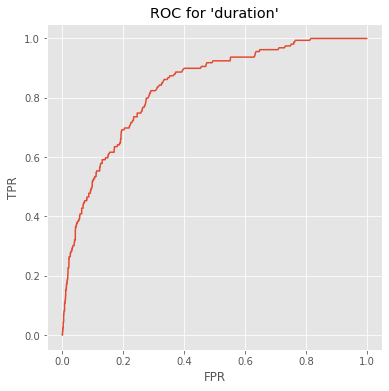

In [73]:
fpr_dur, tpr_dur, threshs = metrics.roc_curve(y_te,score_dur)
plt.figure(figsize=(6,6))
plt.plot(fpr_dur,tpr_dur)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC for 'duration'")

In [76]:
def plot_temp():
    plt.figure(figsize=(6,6))
    plt.plot(fpr_dur,tpr_dur,label='duration')
    plt.plot(fpr_nn,tpr_nn,label='knn')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.title("ROC")

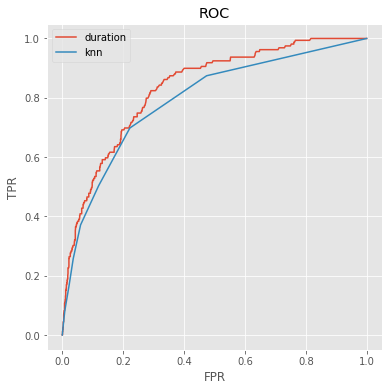

In [77]:
fpr_nn, tpr_nn, threshs = metrics.roc_curve(y_te,score_nn)
plot_temp()

In [78]:
def plot_temp():
    plt.figure(figsize=(6,6))
    plt.plot(rec_dur,prec_dur,label='duration')
    plt.plot(rec_nn,prec_nn,label='knn')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.legend()
    plt.title("PR curve")

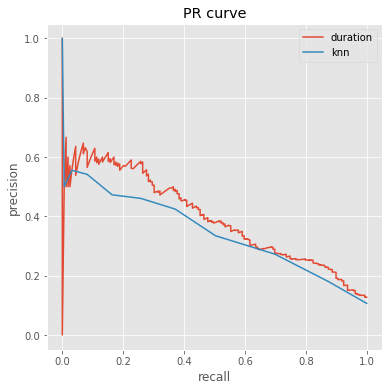

In [79]:
prec_dur, rec_dur, threshs = metrics.precision_recall_curve(y_te,score_dur)
prec_nn, rec_nn, threshs = metrics.precision_recall_curve(y_te,score_nn)
plot_temp()

### Comments

- "Good" ROC should be in top left
- "Good" PR should be large for all recall values
- PR is better for large class imbalance
- ROC treats each type of error equally

### Exercise 6.2

Apply LDA and QDA to the above dataset and compare the PR curves to the previous two methods.  To calculate the "score" you can use the `predict_log_proba` method. 

In [91]:
from sklearn import discriminant_analysis

## Init previous predictors list
preds = [("Duration",score_dur), ("NN", score_nn)]

## Fit and predict with LDA
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_tr,y_tr)
score_pred = lda.predict_log_proba(X_te)[:,1]
preds += [("LDA",score_pred)]

## Fit and predict with QDA
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda.fit(X_tr,y_tr)
score_pred = qda.predict_log_proba(X_te)[:,1]
preds += [("QDA",score_pred)]

In [92]:
def plot_pr_models(X_te, y_te, preds):
    plt.figure(figsize=(6,6))
    for name, score_preds in preds:
        prec, rec, threshs = metrics.precision_recall_curve(y_te,score_preds)
        plt.plot(rec,prec,label=name)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.legend()
    plt.title("PR curve")

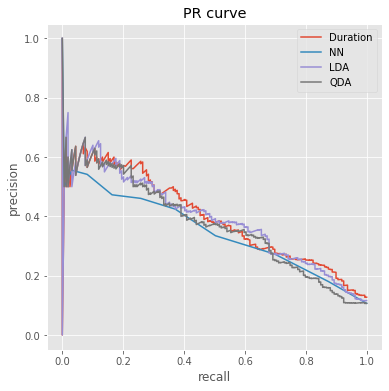

In [93]:
plot_pr_models(X_te, y_te, preds)